In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import nltk
from nltk.corpus import stopwords
import re
import joblib

In [4]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
# 1. Load Dataset
# Example Kaggle dataset: https://www.kaggle.com/datasets/arashnic/amazon-fake-product-review-dataset
df = pd.read_csv('fake reviews dataset.csv')  # Columns: 'review_text', 'label' (1=fake, 0=real)
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (40432, 4)
             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  


label
CG    20216
OR    20216
Name: count, dtype: int64


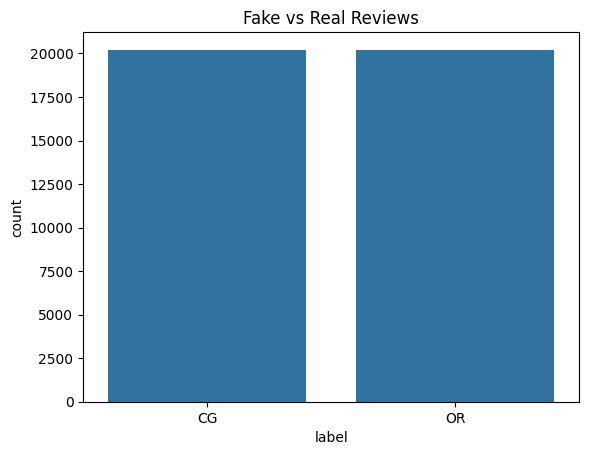

In [7]:

# 2. Exploratory Data Analysis (EDA)
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title('Fake vs Real Reviews')
plt.show()

In [11]:
# Optional: Wordcloud for fake vs real reviews
from wordcloud import WordCloud
fake_reviews = ' '.join(df[df['label']==1]['text_'])
real_reviews = ' '.join(df[df['label']==0]['text_'])

plt.figure(figsize=(10,5))
wc = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words)
plt.imshow(wc.generate(fake_reviews))
plt.axis('off')
plt.title('Fake Reviews Wordcloud')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wc.generate(real_reviews))
plt.axis('off')
plt.title('Real Reviews Wordcloud')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 1000x500 with 0 Axes>

In [12]:
# 3. Data Preprocessing
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_review'] = df['text_'].apply(clean_text)


In [13]:
# 4. Split Data
X = df['clean_review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# 5. Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [19]:
# 6. Model Training
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



=== Logistic Regression ===
Accuracy: 0.8736243353530357
ROC-AUC Score: 0.9471912108043281
Classification Report:
               precision    recall  f1-score   support

          CG       0.88      0.86      0.87      4044
          OR       0.87      0.88      0.87      4043

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



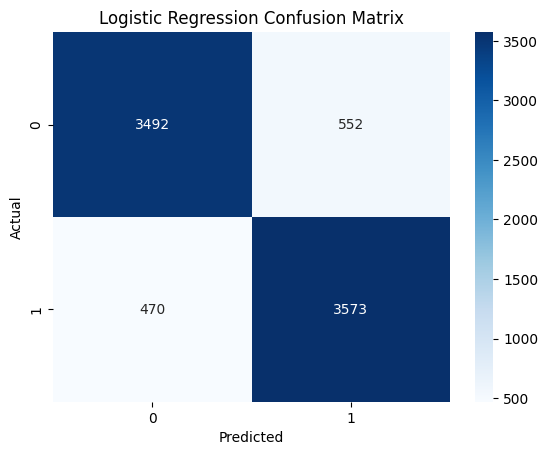


=== Random Forest ===
Accuracy: 0.8512427352541115
ROC-AUC Score: 0.9264178625767069
Classification Report:
               precision    recall  f1-score   support

          CG       0.83      0.88      0.86      4044
          OR       0.88      0.82      0.85      4043

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



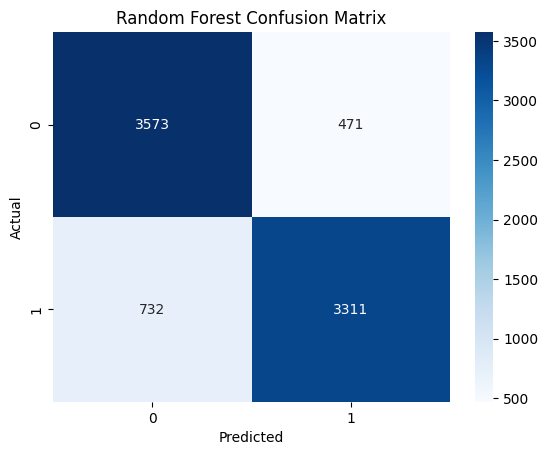

In [18]:
# 7. Model Evaluation
models = {'Logistic Regression': log_model, 'Random Forest': rf_model}

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    y_proba = model.predict_proba(X_test_tfidf)[:,1] if hasattr(model, "predict_proba") else None
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [21]:
# 8. Save Model and Vectorizer
joblib.dump(log_model, 'fake_review_log_model.pkl')
joblib.dump(vectorizer, 'fake_review_tfidf_vectorizer.pkl')

print("Fake Review Detection Model and Vectorizer saved. Project Complete!")

Fake Review Detection Model and Vectorizer saved. Project Complete!
